<a href="https://colab.research.google.com/github/yongbin02/AI/blob/main/5%EC%A3%BC%EC%B0%A8/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

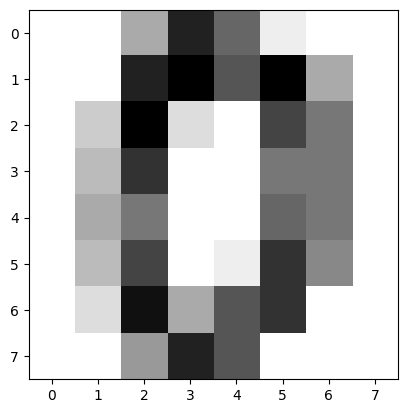

In [29]:
# ----------------------
# 1. 데이터 세트 읽기
# ----------------------

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [30]:
# --------------------
# 2. 이미지 평탄화
# --------------------

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [31]:
# --------------------------------------
# 3. 훈련 데이터 및 테스트 데이터 분리
# --------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

In [33]:
# --------------------------------
# 4. 모델별 학습 및 정확도 측정
# --------------------------------

print("--- 모델별 정확도 ---")
# 4.1. KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
score_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f"K-최근접 이웃(KNN) 정확도: {score_knn:.4f}")

# 4.2. DT (Decision Tree)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
score_dt = metrics.accuracy_score(y_test, y_pred_dt)
print(f"결정 트리(DT) 정확도: {score_dt:.4f}")

# 4.3. LR (Logistic Regression)
lr = LogisticRegression(max_iter=5000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
score_lr = metrics.accuracy_score(y_test, y_pred_lr)
print(f"로지스틱 회귀(LR) 정확도: {score_lr:.4f}")

# 4.4. RF (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
score_rf = metrics.accuracy_score(y_test, y_pred_rf)
print(f"랜덤 포레스트(RF) 정확도: {score_rf:.4f}")

--- 모델별 정확도 ---
K-최근접 이웃(KNN) 정확도: 0.9944
결정 트리(DT) 정확도: 0.8583
로지스틱 회귀(LR) 정확도: 0.9528
랜덤 포레스트(RF) 정확도: 0.9750



--- 테스트 이미지 예측 결과 ---
KNN 예측: 2
DT 예측:  2
LR 예측:  2
RF 예측:  2


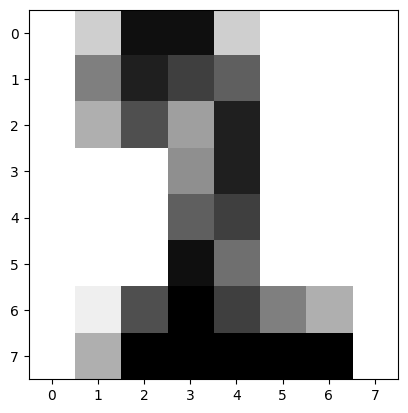

In [34]:
# ----------------------------------
# 5. 이미지에 대한 모델 별 예측 결과
# ----------------------------------

# 1차원 배열 이미지 -> 8X8 행렬로 변환해서 출력
test_image = X_test[10]
plt.imshow(test_image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

# predict는 2차원 배열을 입력으로 받으므
pred_knn = knn.predict([test_image])
pred_dt = dt.predict([test_image])
pred_lr = lr.predict([test_image])
pred_rf = rf.predict([test_image])

print("\n--- 테스트 이미지 예측 결과 ---")
print(f"KNN 예측: {pred_knn[0]}")
print(f"DT 예측:  {pred_dt[0]}")
print(f"LR 예측:  {pred_lr[0]}")
print(f"RF 예측:  {pred_rf[0]}")